In [4]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization

# Bonds

In [1]:
class ZeroCouponBonds:
    
    def __init__(self, principal, maturity, interest_rate):
        # principal amount
        self.principal = principal
        # date to maturity
        self.maturity = maturity
        # market interest rate (discounting)
        self.interest_rate = interest_rate / 100
        
    def present_value(self, x, n):
        return x / (1+self.interest_rate)**n
    
    def calculate_price(self):
        return self.present_value(self.principal, self.maturity)
    
if __name__ == '__main__':
    
    bond = ZeroCouponBonds(1000, 2, 4)
    print("Price of the bond in dollars: %.2f" % bond.calculate_price())

Price of the bond in dollars: 924.56


In [3]:
class CouponBond:
    
    def __init__(self, principal, rate, maturity, interest_rate):
        self.principal = principal
        self.rate = rate /100
        self.maturity = maturity
        self.interest_rate = interest_rate / 100
        
    def present_value(self, x, n):
        return x / (1+self.interest_rate)**n
    
    def calculate_price(self):
        
        price = 0
        
        # discount the coupon payments
        for t in range(1, self.maturity+1):
            price = price + self.present_value(self.principal * self.rate, t)
            
        # discount principal amount
        price = price + self.present_value(self.principal, self.maturity)
        
        return price
    
if __name__ == '__main__':
    
    bond = CouponBond(1000, 10, 3, 4)
    print("Bond price: %.2f" % bond.calculate_price())

Bond price: 1166.51


# Markowitz Model

In [7]:
# stocks we are going to handle
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

In [6]:
# historical data - define START and END dates
start_date = '2016-01-01'
end_date = '2023-01-01'

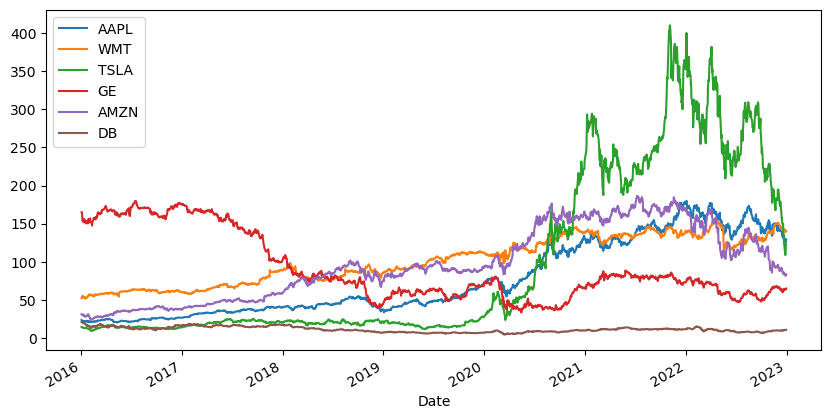

In [8]:
def download_data():
    # name of the stock (key) - stock values (2016-2023) as the values
    stock_data = {}
    
    for stock in stocks:
        # closing prices
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
        
    return pd.DataFrame(stock_data)

def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()

if __name__ == '__main__':
    
    dataset = download_data()
    show_data(dataset)